In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas

In [3]:
# Take in all of our traveler data and read it into pandas

world_energy_df = pd.read_csv(r"C:\Users\arkha\OneDrive\Desktop\Project 1\Resources\World Energy Consumption.csv")
world_energy_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [4]:
world_energy_df.columns.tolist()

['country',
 'year',
 'iso_code',
 'population',
 'gdp',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'electricity_demand',
 'electricity_generation',
 'electricity_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_elec_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 

In [5]:
pd.set_option("display.max_columns", None)
world_energy_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Data columns (total 129 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    country                                       object 
 1    year                                          int64  
 2    iso_code                                      object 
 3    population                                    float64
 4    gdp                                           float64
 5    biofuel_cons_change_pct                       float64
 6    biofuel_cons_change_twh                       float64
 7    biofuel_cons_per_capita                       float64
 8    biofuel_consumption                           float64
 9    biofuel_elec_per_capita                       float64
 10   biofuel_electricity                           float64
 11   biofuel_share_elec                            float64
 12   biofuel_share_energy                        

In [6]:
#See how our data looks for unavailable cells
combined_conditions = world_energy_df[
                    world_energy_df.isna().any(axis=1) | (world_energy_df == '').any(axis=1) | (world_energy_df == 0).any(axis=1)]
combined_conditions

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60,1.519,NaN,500.231,NaN,NaN,NaN,NaN,NaN,71.03,NaN,NaN,NaN,NaN,19.268,NaN,368.65,368.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.75,NaN,NaN,80.225,NaN,NaN,NaN,NaN,NaN,163.22,NaN,NaN,NaN,NaN,NaN,44.275,NaN,184.41,NaN,NaN,NaN,NaN,50.37,NaN,13.663,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,61.50,NaN,NaN,NaN,NaN,NaN,16.682,NaN,NaN,22.53,16.93,NaN,NaN,NaN,NaN,NaN,6.111,4.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,1.516,NaN,499.358,NaN,NaN,NaN,NaN,NaN,80.02,NaN,NaN,NaN,NaN,20.147,NaN,397.19,397.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.51,NaN,NaN,80.694,NaN,NaN,NaN,NaN,NaN,185.35,NaN,NaN,NaN,NaN,NaN,46.665,NaN,198.34,NaN,NaN,NaN,NaN,54.26,NaN,13.661,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,55.14,NaN,NaN,NaN,NaN,NaN,13.883,NaN,NaN,22.42,16.40,NaN,NaN,NaN,NaN,NaN,5.645,4.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,

In [7]:
world_energy_df=world_energy_df.fillna(0)

In [8]:
world_energy_df['non_renewables_consumption'] = (
    world_energy_df['coal_consumption'] + world_energy_df['gas_consumption']+ world_energy_df['oil_consumption'] + world_energy_df['nuclear_consumption']
)
world_energy_df['Total Energy Consumption'] = (
    world_energy_df['renewables_consumption'] + world_energy_df['non_renewables_consumption'] 
)


In [9]:
world_energy_df['non_renewables_production'] = (
    world_energy_df['coal_electricity'] + world_energy_df['coal_production'] + world_energy_df['gas_production'] +
    world_energy_df['gas_electricity'] + world_energy_df['nuclear_electricity'] + world_energy_df['oil_electricity'] + world_energy_df['oil_production']
)

world_energy_df['Total Energy Production'] = (
    world_energy_df['renewables_electricity'] + world_energy_df['non_renewables_production'] 
)

world_energy_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production
0,ASEAN (Ember),2000,0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,5.60,1.519,0.0,500.231,0.0,0.0,0.0,0.0,0.000,71.03,0.000,0.000,0.000,0.000,19.268,0.0,368.65,368.65,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,295.75,0.0,0.0,80.225,0.0,0.0,0.0,0.0,0.0,163.22,0.0,0.0,0.0,0.0,0.0,44.275,0.0,184.41,0.0,0.0,0.0,0.000,50.37,0.0,13.663,0.0,0.0,0.0,0.0,0.000,72.90,0.0,19.775,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,61.50,0.0,0.0,0.0,0.0,0.0,16.682,0.0,0.0,22.53,16.93,0.0,0.0,0.000,0.0,0.0,6.111,4.592,0.0,0.000,0.000,0.0,0.0,0.0,0.000,72.90,0.0,19.775,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295.750,368.650
1,ASEAN (Ember),2001,0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,6.02,1.516,0.0,499.358,0.0,0.0,0.0,0.0,0.000,80.02,0.000,0.000,0.000,0.000,20.147,0.0,397.19,397.19,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,320.51,0.0,0.0,80.694,0.0,0.0,0.0,0.0,0.0,185.35,0.0,0.0,0.0,0.0,0.0,46.665,0.0,198.34,0.0,0.0,0.0,0.000,54.26,0.0,13.661,0.0,0.0,0.0,0.0,0.000,76.68,0.0,19.306,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,55.14,0.0,0.0,0.0,

In [10]:
# Create a new column for the non-renewable energy production, total_ per capita
world_energy_df['non_renewables_prod_per_capita'] = (
    world_energy_df['oil_prod_per_capita'] + world_energy_df['coal_elec_per_capita'] + world_energy_df['gas_elec_per_capita'] + world_energy_df['nuclear_elec_per_capita']
)
world_energy_df['total_prod_per_capita'] = (
    world_energy_df['non_renewables_prod_per_capita'] + world_energy_df['renewables_elec_per_capita']
)
world_energy_df['non_renewables_cons_per_capita'] = (
    world_energy_df['oil_energy_per_capita'] + world_energy_df['coal_cons_per_capita'] + world_energy_df['gas_energy_per_capita'] + world_energy_df['nuclear_energy_per_capita']
)
world_energy_df['total_cons_per_capita'] = (
    world_energy_df['non_renewables_cons_per_capita'] + world_energy_df['renewables_energy_per_capita'])

world_energy_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non_renewables_prod_per_capita,total_prod_per_capita,non_renewables_cons_per_capita,total_cons_per_capita
0,ASEAN (Ember),2000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.60,1.519,0.0,500.231,0.0,0.0,0.0,0.0,0.0,71.03,0.0,0.0,0.0,0.0,19.268,0.0,368.65,368.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295.75,0.0,0.0,80.225,0.0,0.0,0.0,0.0,0.0,163.22,0.0,0.0,0.0,0.0,0.0,44.275,0.0,184.41,0.0,0.0,0.0,0.0,50.37,0.0,13.663,0.0,0.0,0.0,0.0,0.0,72.90,0.0,19.775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.50,0.0,0.0,0.0,0.0,0.0,16.682,0.0,0.0,22.53,16.93,0.0,0.0,0.0,0.0,0.0,6.111,4.592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.90,0.0,19.775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295.75,368.65,0.0,0.0,0.0,0.0
1,ASEAN (Ember),2001,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.02,1.516,0.0,499.358,0.0,0.0,0.0,0.0,0.0,80.02,0.0,0.0,0.0,0.0,20.147,0.0,397.19,397.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320.51,0.0,0.0,80.694,0.0,0.0,0.0,0.0,0.0,185.35,0.0,0.0,0.0,0.0,0.0,46.665,0.0,198.34,0.0,0.0,0.0,0.0,54.26,0.0,13.661,0.0,0.0,0.0,0.0,0.0,76.68,0.0,19.306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [11]:
pd.set_option("display.max_columns", None)
count_result = world_energy_df.count()
count_result

country                           22012
year                              22012
iso_code                          22012
population                        22012
gdp                               22012
                                  ...  
Total Energy Production           22012
non_renewables_prod_per_capita    22012
total_prod_per_capita             22012
non_renewables_cons_per_capita    22012
total_cons_per_capita             22012
Length: 137, dtype: int64

In [12]:
countries_world_energy_df = world_energy_df.loc[(world_energy_df['iso_code'] != 0) ]
countries_world_energy_df


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non_renewables_prod_per_capita,total_prod_per_capita,non_renewables_cons_per_capita,total_cons_per_capita
23,Afghanistan,1900,AFG,4707744.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0
24,Afghanistan,1901,AFG,4751177.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.

In [13]:
countries_world_energy_df=countries_world_energy_df.loc[(countries_world_energy_df["year"] >= 1985)] 
countries_world_energy_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non_renewables_prod_per_capita,total_prod_per_capita,non_renewables_cons_per_capita,total_cons_per_capita
108,Afghanistan,1985,AFG,10512220.0,1.710848e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.027,0.017,83.394,0.877,0.0,0.0,0.0,0.0,0.0,-2.365,-0.272,1067.071,0.656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.529,6.142,3067.605,32.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.124,33.124,0.0,0.0,0.0,0.0
109,Afghanistan,1986,AFG,10448447.0,1.764135e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.960,0.052,88.904,0.929,0.0,0.0,0.0,0.0,0.0,2.185,0.245,1097.040,0.650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,3086.329,32.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [14]:
top_countries = (
    countries_world_energy_df
    .groupby('country', as_index=False)['Total Energy Consumption']
    .sum()
    .sort_values(by='Total Energy Consumption', ascending=False)
)
top_countries.head(20)

,country,Total Energy Consumption
208,United States,948293.487
40,China,805460.294
163,Russia,314050.164
100,Japan,211256.825
92,India,190422.609
75,Germany,149707.107
34,Canada,136674.957
69,France,108083.908
26,Brazil,97158.051
207,United Kingdom,93533.580


In [15]:
top_countries = (
    countries_world_energy_df
    .groupby('country', as_index=False)['Total Energy Production']
    .sum()
    .sort_values(by='Total Energy Production', ascending=False)
)
top_countries.head(20)

,country,Total Energy Production
208,United States,777916.880
40,China,737581.028
163,Russia,535058.084
172,Saudi Arabia,232016.980
34,Canada,163226.341
92,India,140452.856
10,Australia,128418.191
94,Iran,126160.440
93,Indonesia,106767.197
125,Mexico,89694.270


In [16]:
top_country_df = countries_world_energy_df.loc[
    countries_world_energy_df['country'].isin([
        'China', 'United States', 'Russia', 'India', 'Japan', 
        'Canada', 'Brazil', 'France', 'South Korea', 'United Kingdom', 'Mexico', 'Spain', 'Italy', 
        'Iran', 'Ukraine', 'South Africa', 'Germany', 'Saudi Arabia', 'Indonesia', 'Australia', 
        'United Arab Emirates', 'Iraq', 'Algeria', 'Kuwait', 'Venezuela', 'Norway', 'Nigeria'
    ])
]

top_country_df=top_country_df.loc[top_country_df['year'] < 2019 ]

top_country_df
                                         
                                      

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non_renewables_prod_per_capita,total_prod_per_capita,non_renewables_cons_per_capita,total_cons_per_capita
673,Algeria,1985,DZA,22132910.0,1.203642e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,4.358,0.419,452.948,10.025,0.0,0.0,14.286,0.008,2.852,0.063,0.0,3.822,0.00,12.274,4.679,0.807,2.100,11850.976,2.179,0.590,1.527,0.000,0.00,11764.669,260.386,0.000,99.272,-0.930,-1.444,153.807,0.000,0.00,6949.267,9.896,33.622,16869.953,373.381,0.000,58.639,0.00,42.920,0.574,1.910,29.187,0.646,86.307,5.263,0.728,42.920,0.574,1.910,0.000,0.00,86.307,0.000,0.728,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.715,2.552,96.554,0.000,0.00,4362.454,-3.536,-20.061,24728.770,547.320,0.000,36.811,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,554.559,262.297,42.920,0.574,1.910,0.000,0.00,86.307,0.000,0.728,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,260.386,262.296,920.764,920.764,24728.770,24728.770,11764.669,11850.976
674,Algeria,1986,DZA,22882560.0,1.191450e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,2.668,0.267,449.799,10.293,0.0,0.0,12.500,0.008,3.103,0.071,0.0,3.7

In [ ]:
# pd.set_option("display.max_columns", None)
# count_result = top_country_df.count()
# count_result

country                           918
year                              918
iso_code                          918
population                        918
gdp                               918
                                 ... 
Total Energy Production           918
non_renewables_prod_per_capita    918
total_prod_per_capita             918
non_renewables_cons_per_capita    918
total_cons_per_capita             918
Length: 137, dtype: int64

In [46]:
# six_continents = world_energy_df.loc[
#     (
#         (world_energy_df["country"] == "Asia") |
#         (world_energy_df["country"] == "Africa") |
#         (world_energy_df["country"] == "Australia") |
#         (world_energy_df["country"] == "Europe") |
#         (world_energy_df["country"] == "North America") |
#         (world_energy_df["country"] == "South America")
#     ) & (world_energy_df["year"] >= 1985)  
# ]
# six_continents

In [45]:
# six_continents=six_continents.rename(columns={'country': 'continent'})
# six_continents

In [44]:
# # Plot energy consumption over time by continent
# consumption_plot_1a = six_continents.hvplot.line(
#     x='year', y='Total Energy Consumption', by='continent', 
#     title="Total Energy Consumption Over Time by Continent",
#     xlabel='Year', ylabel='Total Energy Consumption',
#     line_width=2, height=400, width=1000
# )
# consumption_plot_1a

In [43]:
# # Plot energy production over time by continent
# consumption_plot_1b = six_continents.hvplot.line(
#     x='year', 
#     y='coal_production', 
#     by='continent',  # Group the data by continent
#     title="Coal Production Over Time by Continent",
#     xlabel='Year',
#     ylabel='Coal Production (metric tons)',  # You can adjust this label if necessary
#     line_width=2,
#     height=400,
#     width=1000
# )
# consumption_plot_1b

In [42]:
# # Plotting the line plot by continent using Matplotlib
# plt.figure(figsize=(10, 6))  # Set figure size

# # Loop through each continent and plot its line
# for continent in six_continents['continent'].unique():
#     continent_data = six_continents[six_continents['continent'] == continent]
#     plt.plot(continent_data['year'], continent_data['Total Energy Consumption'], label=continent, linewidth=2)

# # Add title and labels
# plt.title("Total Energy Consumption Over Time by Continent")
# plt.xlabel('Year')
# plt.ylabel('Total Energy Consumption')

# # Show legend to identify the continents
# plt.legend(title='Continent')

# # Display the plot
# plt.tight_layout()
# plt.show()

In [41]:
# # Plotting the line plot by continent using Matplotlib
# plt.figure(figsize=(8, 6))  # Set figure size

# # Loop through each continent and plot its line
# for continent in six_continents['continent'].unique():
#     continent_data = six_continents[six_continents['continent'] == continent]
#     plt.plot(continent_data['year'], continent_data['Total Energy Production'], label=continent, linewidth=2)

# # Add title and labels
# plt.title("Total Energy Production Over Time by Continent")
# plt.xlabel('Year')
# plt.ylabel('Total Energy Production')

# # Show legend to identify the continents
# plt.legend(title='Continent')

# # Display the plot
# plt.tight_layout()
# plt.show()

In [40]:
# #Filter for Asia and the relevant columns
# asia_data = six_continents[(six_continents['continent'] == 'Asia') & 
#                            ((six_continents['year'] == 1990)|
#                             (six_continents['year'] == 1995)| 
#                             (six_continents['year'] == 2000)|
#                              (six_continents['year'] == 2005)|
#                             (six_continents['year'] == 2010)|
#                             (six_continents['year'] == 2015)|
#                             (six_continents['year'] == 2020))]

# # Group by year and sum production values
# asia_grouped = asia_data.groupby('year')[['renewables_electricity', 'non_renewables_production']].sum()

# # Plot
# asia_grouped.plot(kind='bar', figsize=(10, 6))
# plt.title('Renewables and Non-Renewables Production in Asia (1990 and 2000)')
# plt.xlabel('Year')
# plt.ylabel('Production')
# plt.show()

In [39]:
# # Filter data for the year 2020
# year_2022_data = six_continents[six_continents['year'] == 2022]

# # Plot coal consumption for 2022 by continent
# consumption_2022_plot = year_2022_data.hvplot.bar(
#     x='continent', y='coal_consumption', 
#     title="Coal Consumption by Continent in 2022",
#     xlabel='Continent', ylabel='Coal Consumption',
#     color='blue', height=400, width=600
# )

# # Plot coal production for 2020 by continent
# production_2022_plot = year_2022_data.hvplot.bar(
#     x='continent', y='coal_production', 
#     title="Coal Production by Continent in 2022",
#     xlabel='Continent', ylabel='Energy Production',
#     color='green', height=400, width=600
# )

# (consumption_2022_plot + production_2022_plot).cols(1)

In [47]:
# # Renewables vs non-renewables energy consumption per continent
# energy_mix_plot = year_2022_data.hvplot.bar(
#     x='continent', y=['renewables_consumption', 'non_renewables_consumption'], 
#     stacked=True, title="Energy Mix by Continent in 2022",
#     xlabel='Continent', ylabel='Energy Source Contribution',
#     height=400, width=800
# )
# energy_mix_plot

In [48]:
# # Filter data for the year 2020
# year_2022_country_df = top_country_df[top_country_df['year'] == 2018]

# # Plot coal consumption for 2022 by continent
# consumption_2022_country_plot = year_2022_country_df.hvplot.bar(
#     x='country', y='coal_consumption', 
#     title="Coal Consumption by Continent in 2022",
#     xlabel='Country', ylabel='Coal Consumption',
#     color='blue', height=400, width=600
# )

# # Plot coal production for 2020 by continent
# production_2022_country_plot = year_2022_country_df.hvplot.bar(
#     x='country', y='coal_production', 
#     title="Coal Production by Continent in 2022",
#     xlabel='Country', ylabel='Energy Production',
#     color='green', height=400, width=600
# )

# (consumption_2022_country_plot + production_2022_country_plot).cols(1)

In [ ]:
# Stats (Amy)
# Statistical Analysis of per capita consumption and production

#Dataframe for per capita consumption and production for top countries over the years
filtered_df = top_country_df[['country', 'year', 'total_cons_per_capita', 'total_prod_per_capita']]

print(filtered_df)

# Descriptive statistics for both consumption and production per capita
consumption_stats = filtered_df['total_cons_per_capita'].describe()
production_stats = filtered_df['total_prod_per_capita'].describe()

# Additional statistics
consumption_mean = filtered_df['total_cons_per_capita'].mean()
production_mean = filtered_df['total_prod_per_capita'].mean()

consumption_median = filtered_df['total_cons_per_capita'].median()
production_median = filtered_df['total_prod_per_capita'].median()

consumption_std = filtered_df['total_cons_per_capita'].std()
production_std = filtered_df['total_prod_per_capita'].std()

consumption_variance = filtered_df['total_cons_per_capita'].var()
production_variance = filtered_df['total_prod_per_capita'].var()

# Get min and max values
consumption_min = filtered_df['total_cons_per_capita'].min()
production_min = filtered_df['total_prod_per_capita'].min()

consumption_max = filtered_df['total_cons_per_capita'].max()
production_max = filtered_df['total_prod_per_capita'].max()

# Median for additional insights
consumption_median = filtered_df['total_cons_per_capita'].median()
production_median = filtered_df['total_prod_per_capita'].median()

# Display the results
print("Consumption per Capita Statistics:")
print(consumption_stats)
print(f"Mean: {consumption_mean}, Median: {consumption_median}")
print(f"Standard Deviation: {consumption_std}, Variance: {consumption_variance}")
print(f"Min: {consumption_min}, Max: {consumption_max}")
print("\n")

print("Production per Capita Statistics:")
print(production_stats)
print(f"Mean: {production_mean}, Median: {production_median}")
print(f"Standard Deviation: {production_std}, Variance: {production_variance}")
print(f"Min: {production_min}, Max: {production_max}")


         country  year  total_cons_per_capita  total_prod_per_capita
673      Algeria  1985              11850.976              24728.770
674      Algeria  1986              12126.726              24639.449
675      Algeria  1987              12090.516              24751.865
676      Algeria  1988              12598.339              25221.705
677      Algeria  1989              11935.478              25458.850
...          ...   ...                    ...                    ...
21187  Venezuela  2014              32559.598              56103.062
21188  Venezuela  2015              31748.310              59459.658
21189  Venezuela  2016              27460.874              52940.904
21190  Venezuela  2017              27842.626              46048.284
21191  Venezuela  2018              24079.881              35683.105

[918 rows x 4 columns]
Consumption per Capita Statistics:
count       918.000000
mean      46732.686029
std       39598.036155
min           0.000000
25%       16224.10400

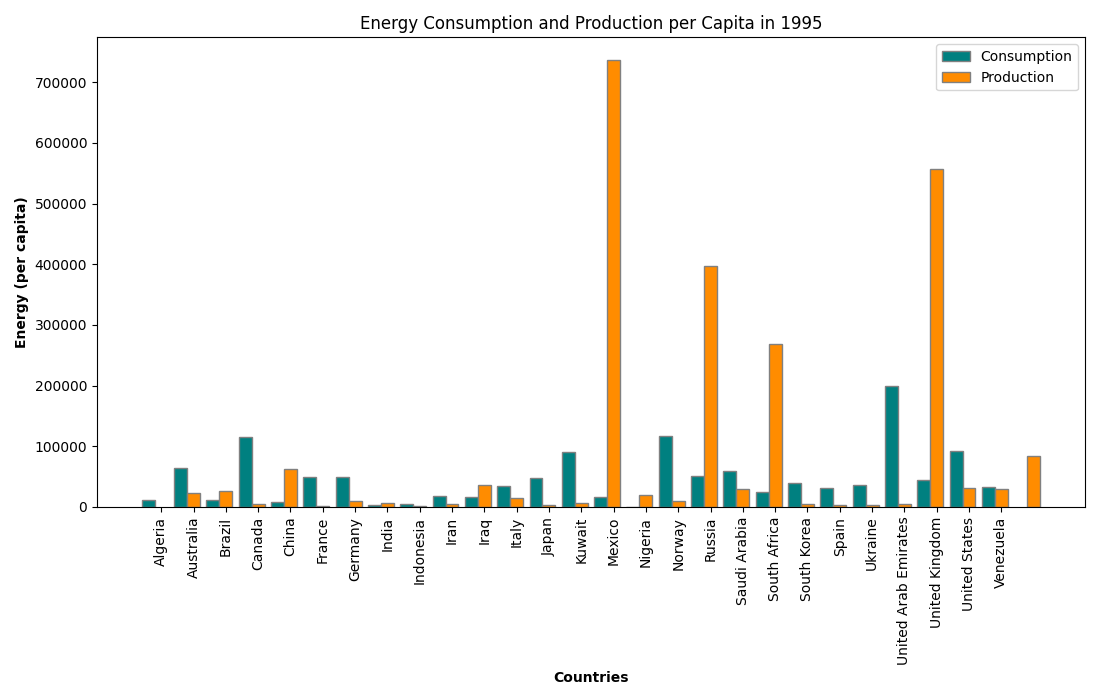

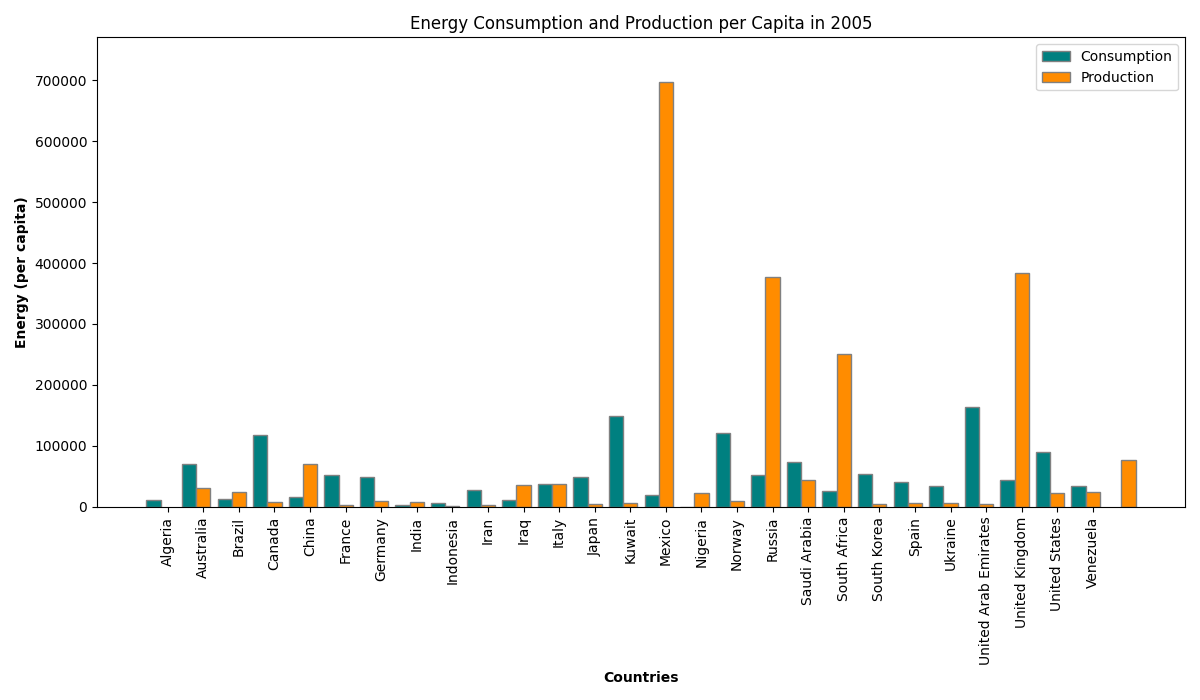

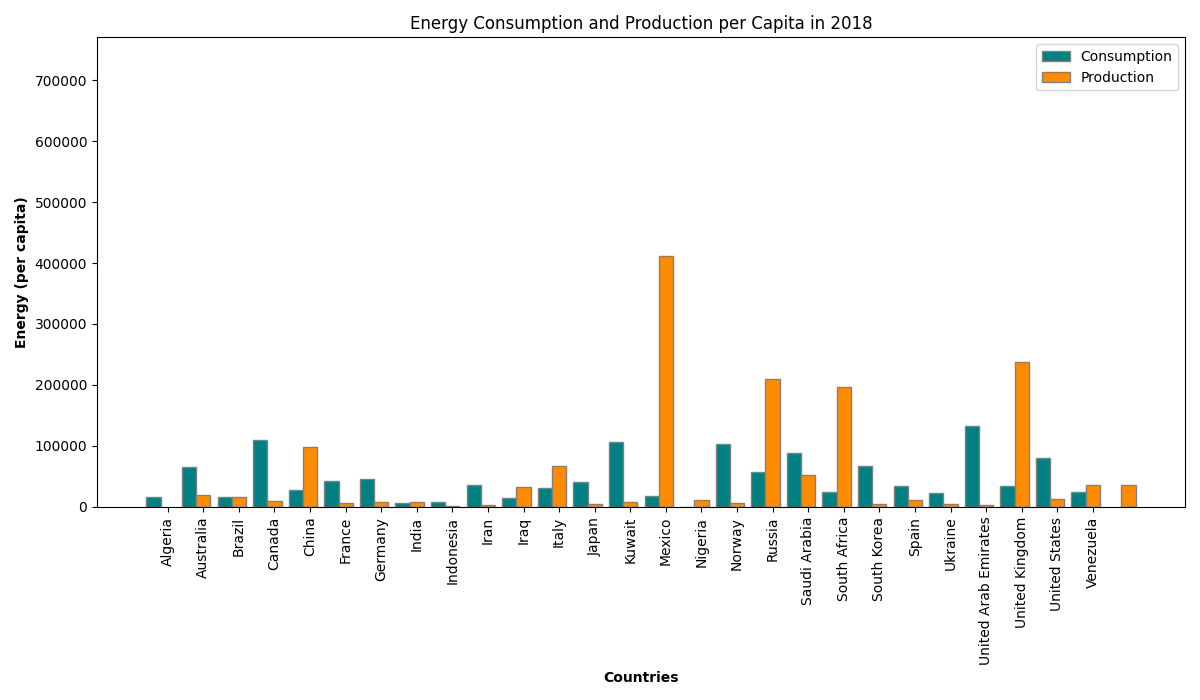

In [49]:

# Visuals (Amy)
# Filter data for the specific year (1995)
year_to_plot = 1995
year_filtered_df = top_country_df[top_country_df['year'] == year_to_plot]

# Select relevant columns for consumption and production
filtered_df = year_filtered_df[['country', 'year', 'total_cons_per_capita', 'total_prod_per_capita']]

# Set the bar width and space between
bar_width = 0.4
gap = 1.0


# Set positions of bars on the X-axis
r1 = [x * gap for x in range(len(filtered_df))]  # Positions for consumption
r2 = [x + bar_width + gap for x in r1]  # Positions for production (shifted by bar_width)

# Increase figure size to allow more space for labels
plt.figure(figsize=(11, 7)) 

# Create the bar chart
plt.bar(r1, filtered_df['total_cons_per_capita'], color='teal', width=bar_width, edgecolor='grey', label='Consumption')
plt.bar(r2, filtered_df['total_prod_per_capita'], color='darkorange', width=bar_width, edgecolor='grey', label='Production')

# Add labels and title
plt.xlabel('Countries', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(filtered_df))], filtered_df['country'], rotation = 90, ha = 'center')
plt.ylabel('Energy (per capita)', fontweight='bold')
plt.title(f'Energy Consumption and Production per Capita in {year_to_plot}')

# Adjust layout to make room for longer labels
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

#plt.clf()

# Filter data for the specific year (2005)
year_to_plot = 2005
year_filtered_df = top_country_df[top_country_df['year'] == year_to_plot]

# Select relevant columns for consumption and production
filtered_df = year_filtered_df[['country', 'year', 'total_cons_per_capita', 'total_prod_per_capita']]

# Set the bar width and space between
bar_width = 0.4
gap = 1.0


# Set positions of bars on the X-axis
r1 = [x * gap for x in range(len(filtered_df))]  # Positions for consumption
r2 = [x + bar_width + gap for x in r1]  # Positions for production (shifted by bar_width)

# Increase figure size to allow more space for labels
plt.figure(figsize=(12, 7)) 

# Create the bar chart
plt.bar(r1, filtered_df['total_cons_per_capita'], color='teal', width=bar_width, edgecolor='grey', label='Consumption')
plt.bar(r2, filtered_df['total_prod_per_capita'], color='darkorange', width=bar_width, edgecolor='grey', label='Production')

# Add labels and title
plt.xlabel('Countries', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(filtered_df))], filtered_df['country'], rotation = 90, ha = 'center')
plt.ylabel('Energy (per capita)', fontweight='bold')
plt.title(f'Energy Consumption and Production per Capita in {year_to_plot}')

# Adjust layout to make room for longer labels
plt.tight_layout()

# Adjust the y-axis limit to match the 1995 y axis for better comparison
plt.ylim(0, 700000 * 1.1)

plt.legend()

# Show the plot
plt.show()

#plt.clf()


# Filter data for the specific year (2018)
year_to_plot = 2018
year_filtered_df = top_country_df[top_country_df['year'] == year_to_plot]

# Select relevant columns for consumption and production
filtered_df = year_filtered_df[['country', 'year', 'total_cons_per_capita', 'total_prod_per_capita']]

# Set the bar width and space between
bar_width = 0.4
gap = 1.0


# Set positions of bars on the X-axis
r1 = [x * gap for x in range(len(filtered_df))]  # Positions for consumption
r2 = [x + bar_width + gap for x in r1]  # Positions for production (shifted by bar_width)

# Increase figure size to allow more space for labels
plt.figure(figsize=(12, 7)) 

# Create the bar chart
plt.bar(r1, filtered_df['total_cons_per_capita'], color='teal', width=bar_width, edgecolor='grey', label='Consumption')
plt.bar(r2, filtered_df['total_prod_per_capita'], color='darkorange', width=bar_width, edgecolor='grey', label='Production')

# Add labels and title
plt.xlabel('Countries', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(filtered_df))], filtered_df['country'], rotation = 90, ha = 'center')
plt.ylabel('Energy (per capita)', fontweight='bold')
plt.title(f'Energy Consumption and Production per Capita in {year_to_plot}')

# Adjust layout to make room for longer labels
plt.tight_layout()

# Adjust the y-axis limit to match the 1995 y axis for better comparison
plt.ylim(0, 700000 * 1.1)

plt.legend()

# Show the plot
plt.show()

#plt.clf()


In [32]:

filtered_df


,country,year,total_cons_per_capita,total_prod_per_capita
706,Algeria,2018,15971.084,19710.234
1630,Australia,2018,65072.669,16667.794
2971,Brazil,2018,16539.110,10552.128
3769,Canada,2018,110059.275,98012.406
4401,China,2018,27109.420,6571.010
7350,France,2018,43334.205,8797.438
7799,Germany,2018,45781.407,7356.384
9284,India,2018,6633.665,1484.813
9407,Indonesia,2018,8026.891,2715.201
9530,Iran,2018,36060.902,33158.870


In [35]:
# # Renewables vs non-renewables energy consumption for Top 20 countries
# energy_mix_plot_country = year_2018_country_df.hvplot.bar(
#     x='country', y=['renewables_consumption', 'non_renewables_consumption'], 
#     stacked=True, title="Energy Consumption by Country in 2018",
#     xlabel='Country', ylabel='Energy Consumption (TWh) ',
#     height=400, width=1200,
#     rot=90
# )
# energy_mix_plot_country

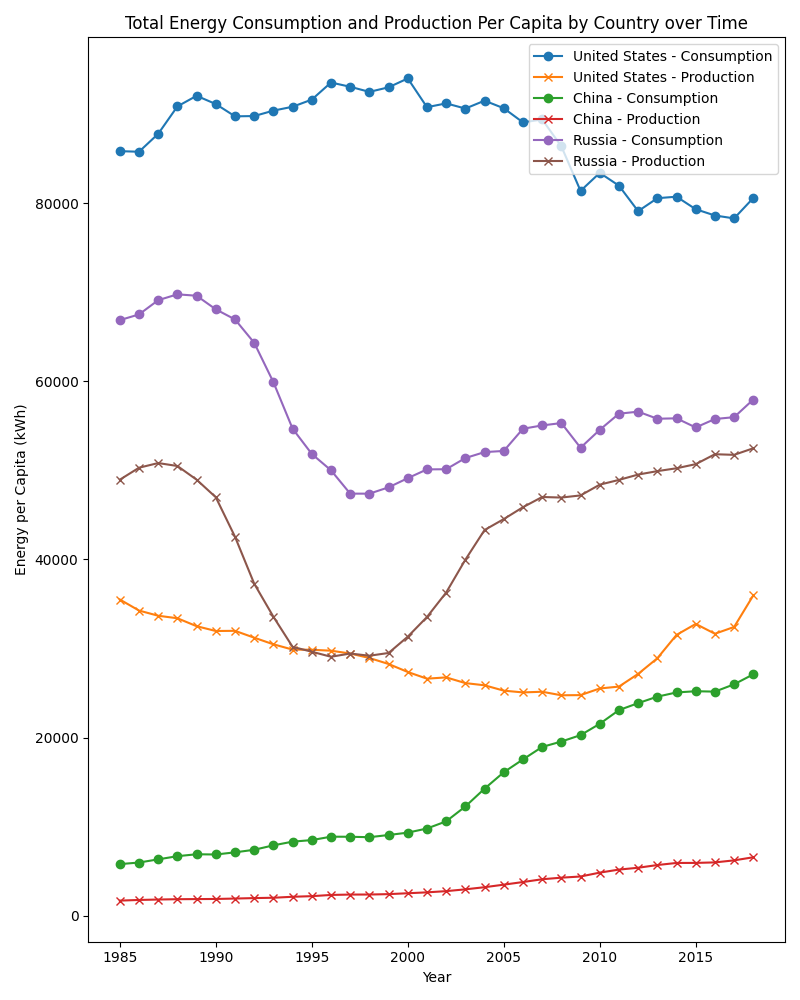

In [36]:
# List of countries you want to plot (you can use all or a specific subset)
countries = top_country_df['country'].unique()
countries_to_plot = ['United States', 'China', 'Russia']
countries_to_plot_2 = ['Japan', 'India', 'Germany']
# Create the plot
plt.figure(figsize=(8,10))

# Plot each country's data for both total consumption and total production per capita
for country in countries_to_plot:
    country_data = top_country_df[top_country_df['country'] == country]
    
    # Plotting total consumption per capita
    plt.plot(country_data['year'], country_data['total_cons_per_capita'], label=f'{country} - Consumption', linestyle='-', marker='o')

    # Plotting total production per capita
    plt.plot(country_data['year'], country_data['total_prod_per_capita'], label=f'{country} - Production', linestyle='-', marker='x')

# Adding labels and title
plt.title('Total Energy Consumption and Production Per Capita by Country over Time')
plt.xlabel('Year')
plt.ylabel('Energy per Capita (kWh)') 
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

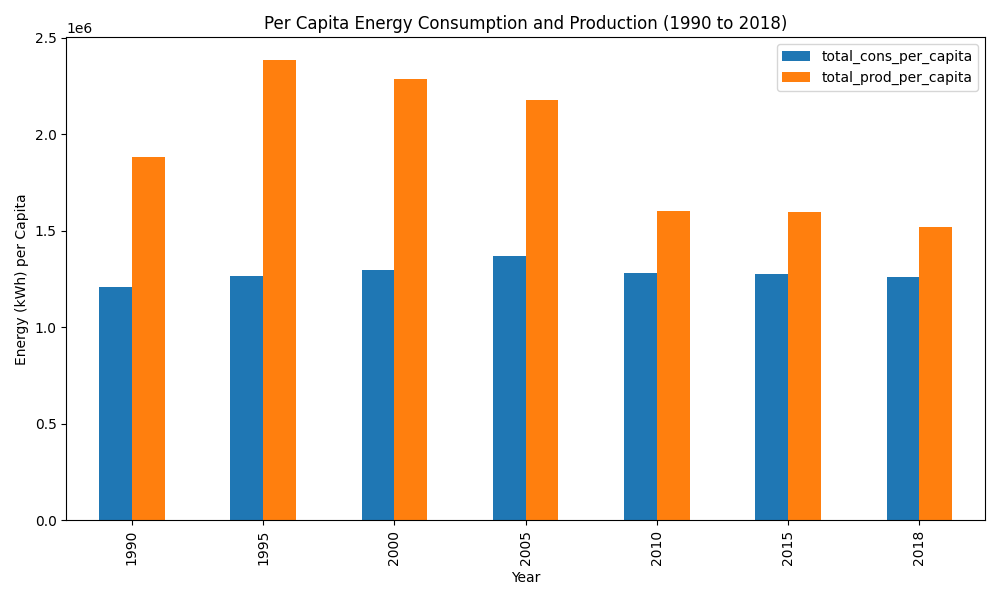

In [37]:
# Filter for specific years and all countries
per_capita_data = top_country_df[(top_country_df['year'].isin([1990, 1995, 2000, 2005, 2010, 2015, 2018]))]

# Group by year and sum consumption and production per capita
per_capita_relation = per_capita_data.groupby('year')[['total_cons_per_capita', 'total_prod_per_capita']].sum()

# Plotting the bar chart
per_capita_relation.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Per Capita Energy Consumption and Production (1990 to 2018)')
plt.xlabel('Year')
plt.ylabel('Energy (kWh) per Capita')
plt.xticks(rotation=90)  # Optional: rotates the x-axis labels to avoid overlap

# Show the plot
plt.tight_layout()
plt.show()

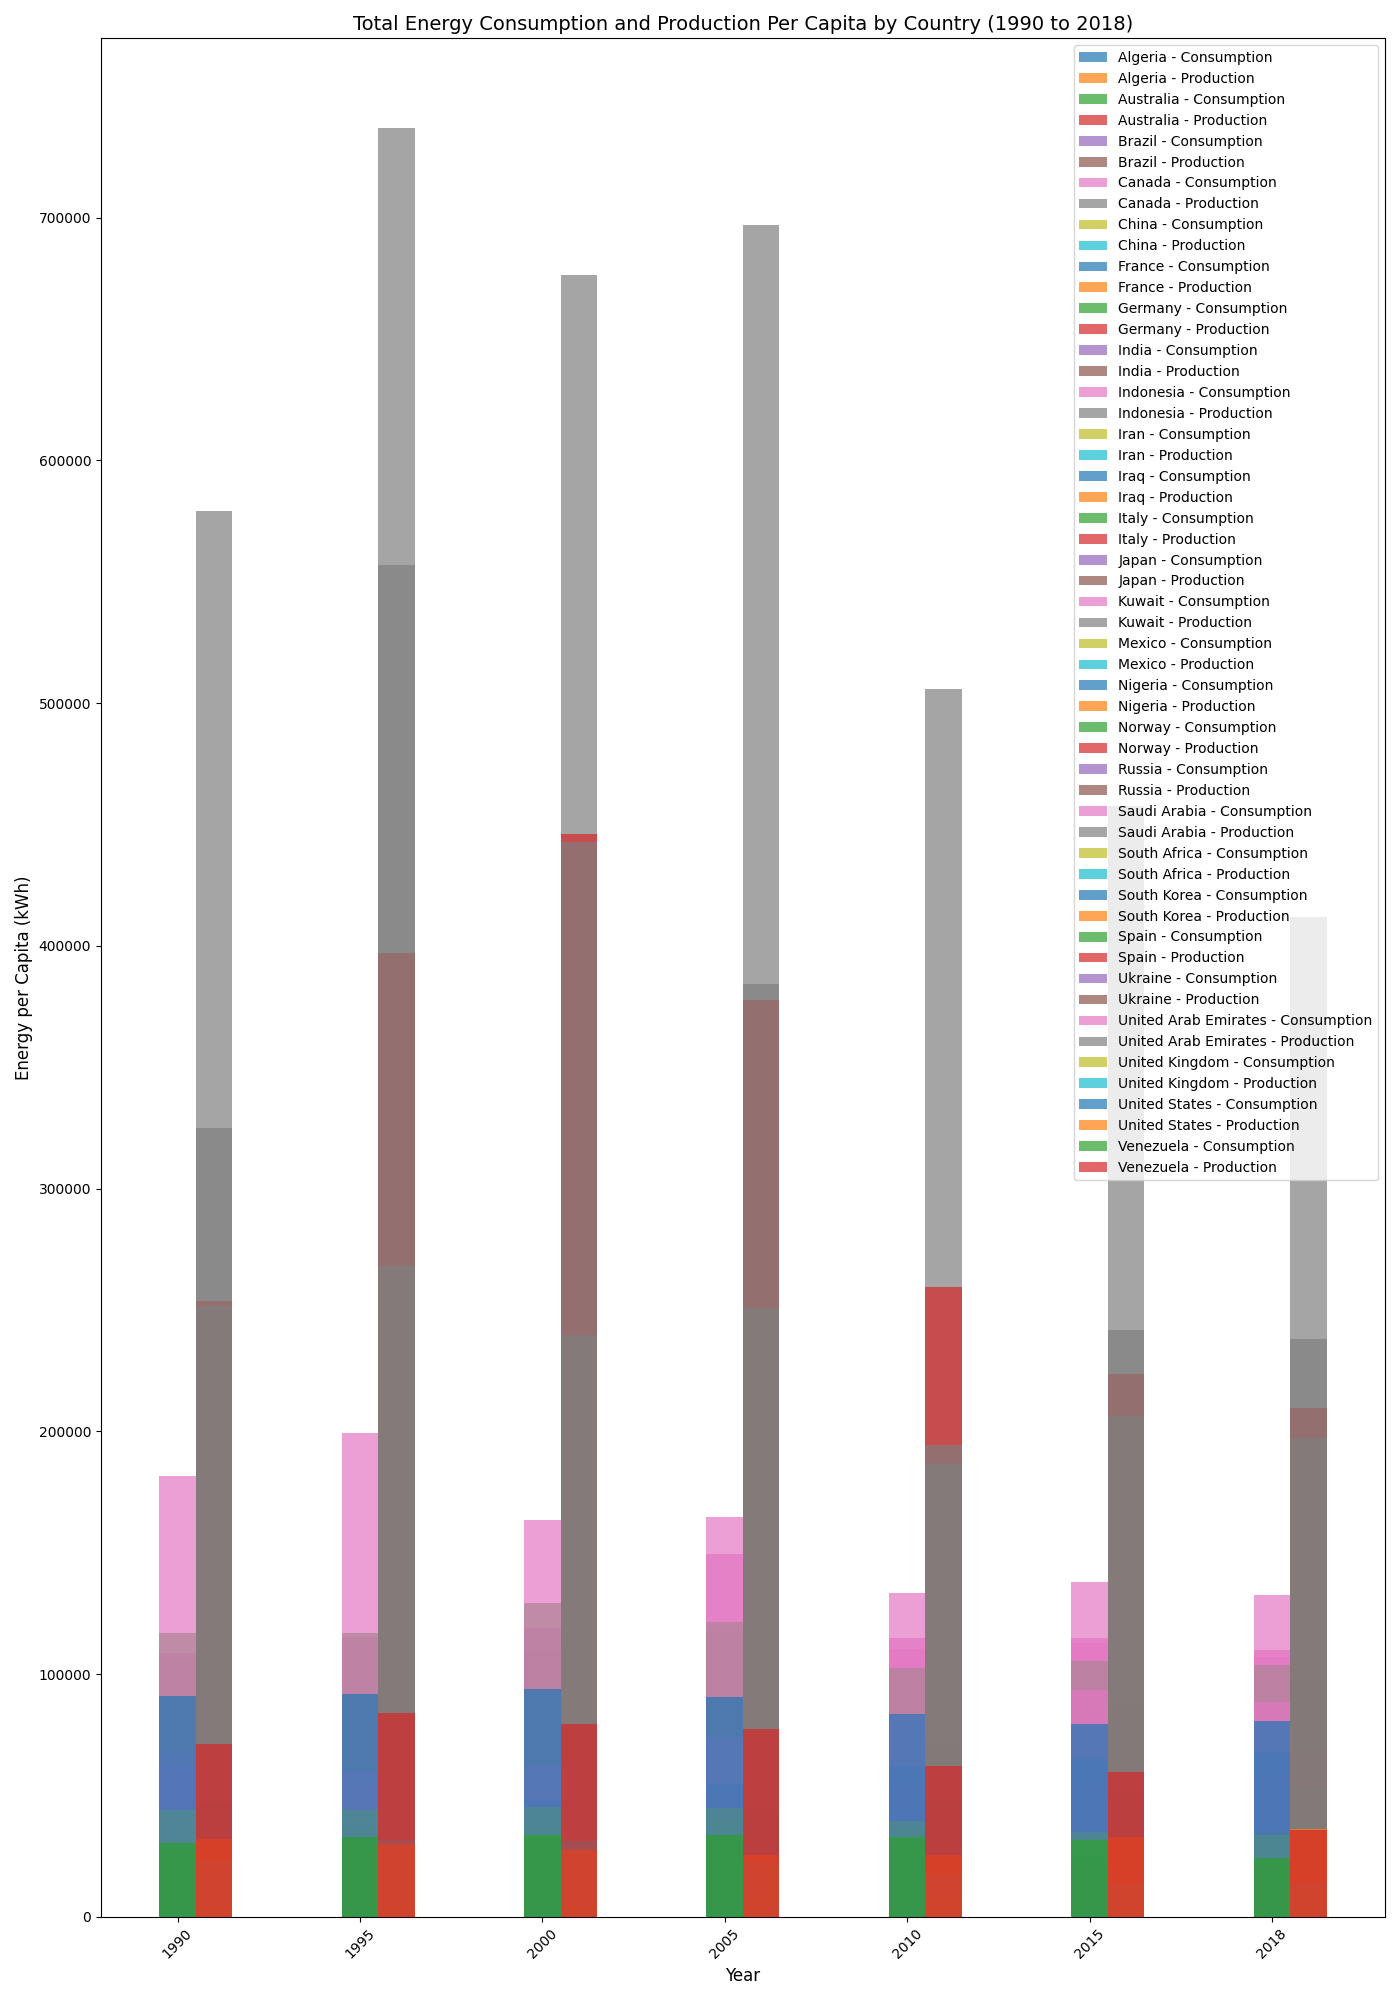

In [38]:
# Filter for specific years (1990, 1995, 2000, 2005, 2010, 2015, 2018)
per_capita_data = top_country_df[top_country_df['year'].isin([1990, 1995, 2000, 2005, 2010, 2015, 2018])]

# Group by both 'country' and 'year' and sum the consumption and production per capita
per_capita_relation = per_capita_data.groupby(['country', 'year'])[['total_cons_per_capita', 'total_prod_per_capita']].sum()

# Plotting
# Reset index to get 'country' and 'year' back as columns
per_capita_relation = per_capita_relation.reset_index()

# Create a plot with a separate bar for each country (grouped by year)
plt.figure(figsize=(14, 20))

# Define the positions for the bars (we'll have two bars for each year per country)
bar_width = 0.2
years = per_capita_relation['year'].unique()

# Plot for each country
countries = per_capita_relation['country'].unique()

for i, country in enumerate(countries):
    country_data = per_capita_relation[per_capita_relation['country'] == country]
    
    # Positioning the bars for 'consumption' and 'production'
    bar_positions = range(len(country_data))

    # Plotting the bars for consumption and production per capita for each country
    plt.bar(bar_positions, country_data['total_cons_per_capita'], bar_width, label=f'{country} - Consumption', alpha= 0.7)
    plt.bar([pos + bar_width for pos in bar_positions], country_data['total_prod_per_capita'], bar_width, label=f'{country} - Production', alpha= 0.7)

# Add labels and title
plt.title('Total Energy Consumption and Production Per Capita by Country (1990 to 2018)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy per Capita (kWh)', fontsize=12)
plt.xticks(ticks=range(len(years)), labels=years, rotation=45)  # Place year labels on the x-axis

# Show legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Check the shape of the data
print(top_country_df[['gdp', 'renewables_consumption']].shape)

# Plotting the scatter plot using Matplotlib
plt.figure(figsize=(7, 10))

# Scatter plot of % change in GDP vs % change in renewable energy consumption
plt.scatter(top_country_df['gdp'], top_country_df['renewables_consumption'], c='darkgreen', s=100, label='Data points')

# Add labels and title
plt.title('Correlation between GDP and Renewable Energy Consumption')
plt.xlabel('GDP')
plt.ylabel('Renewable Energy Consumption')

# Add a linear regression line (Fit a line to the scatter plot)
try:
    slope, intercept = np.polyfit(top_country_df['gdp'], top_country_df['renewables_consumption'], 1)
    plt.plot(top_country_df['gdp'], slope * top_country_df['gdp'] + intercept, color='red', label='Regression Line')
except Exception as e:
    print(f"Error fitting regression line: {e}")

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Calculate the Pearson correlation coefficient between % change in GDP and renewable energy consumption
correlation = top_country_df[['gdp', 'renewables_consumption']].corr().iloc[0, 1]
print(f"Correlation between GDP and renewable energy consumption: {correlation:.2f}")

In [ ]:
# Plotting the scatter plot 
plt.figure(figsize=(7, 10))

# Scatter plot of % change in GDP vs % change in renewable energy consumption
plt.scatter(top_country_df['total_cons_per_capita'], top_country_df['total_prod_per_capita'], c='teal', s=100, label='Data points')

# Add labels and title
plt.title('Correlation between Per Capita Energy Consumption and Production')
plt.xlabel('Energy Production (kWh)')
plt.ylabel('Energy Consumption (kWh)')

# Add a linear regression line (Fit a line to the scatter plot)
try:
    slope, intercept = np.polyfit(top_country_df['total_cons_per_capita'], top_country_df['total_prod_per_capita'], 1)
    plt.plot(top_country_df['total_cons_per_capita'], slope * top_country_df['total_cons_per_capita'] + intercept, color='red', label='Regression Line')
except Exception as e:
    print(f"Error fitting regression line: {e}")

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Calculate the Pearson correlation coefficient between total consumption per capita and total production per capita
correlation = top_country_df[['total_cons_per_capita', 'total_prod_per_capita']].corr().iloc[0, 1]
print(f"Correlation between per capita energy production and consumption: {correlation:.2f}")

In [ ]:
countries_to_plot = ['United States', 'China', 'Russia']
countries_to_plot_2 = ['Japan', 'India', 'Germany']

    
# Create a subplot with two axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plotting GDP on the left y-axis
for country in countries_to_plot:
    country_data = top_country_df[top_country_df['country'] == country]
    ax1.plot(country_data['year'], country_data['gdp'], label=f'{country} - GDP', linestyle='-', marker='o')

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP and Renewable Energy Consumption by Country')
ax1.legend(loc='best')

# Create a second axis for renewable consumption
ax2 = ax1.twinx()  # Instantiate second axis
for country in countries_to_plot:
    country_data = top_country_df[top_country_df['country'] == country]
    ax2.plot(country_data['year'], country_data['renewables_consumption'], label=f'{country} - Renewables Cons', linestyle='-', marker='x')

ax2.set_ylabel('Renewable Energy Consumption (TWh)')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

# Create a subplot with two axes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plotting GDP on the left y-axis
for country in countries_to_plot_2:
    country_data = top_country_df[top_country_df['country'] == country]
    ax1.plot(country_data['year'], country_data['gdp'], label=f'{country} - GDP', linestyle='-', marker='o')

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP and Renewable Energy Consumption by Country')
ax1.legend(loc='best')

# Create a second axis for renewable consumption
ax2 = ax1.twinx()  # Instantiate second axis
for country in countries_to_plot_2:
    country_data = top_country_df[top_country_df['country'] == country]
    ax2.plot(country_data['year'], country_data['renewables_consumption'], label=f'{country} - Renewables Cons', linestyle='-', marker='x')

ax2.set_ylabel('Renewable Energy Consumption (TWh)')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
# Grouping by year and aggregating for average values across all countries
df_avg = top_country_df.groupby('year').agg({'gdp': 'mean', 'renewables_consumption': 'mean'})

# Plotting time series of average GDP and Renewable Energy Consumption
plt.figure(figsize=(14, 8))

# GDP plot
plt.subplot(2, 1, 1)
plt.plot(df_avg.index, df_avg['gdp'], color='blue', label='Average GDP')
plt.title("Top Countries' Average GDP and Renewable Energy Consumption Over Time")
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()

# Renewable energy consumption plot
plt.subplot(2, 1, 2)
plt.plot(df_avg.index, df_avg['renewables_consumption'], color='green', label='Average Renewable Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Consumption')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

# Subset the data to just a few variables
variables = ['total_cons_per_capita', 'total_prod_per_capita']

# Set up the grid for the pairwise plots
fig, axes = plt.subplots(len(variables), len(variables), figsize=(10, 10))

# Loop over all pairs of variables and create scatter plots
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        ax = axes[i, j]

        
        if i == j:
            # Diagonal: histogram or density plot (optional)
            ax.hist(top_country_df[var1], bins=20, color='gray', alpha=0.5)
            ax.set_title(f'{var1} Distribution')
        else:
            # Off-diagonal: scatter plot
            ax.scatter(top_country_df[var1], top_country_df[var2], alpha=0.5)
            ax.set_xlabel(var1)
            ax.set_ylabel(var2)
            
# # Rotate x-axis labels for the bottom row of subplots
# for ax in axes[-1, :]:  # Bottom row: axes[-1, :]
#     for label in ax.get_xticklabels():  # Loop over the x-axis tick labels
#         label.set_rotation(90)  # Set rotation to 90 degrees
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Apply the rotation

# Tight layout for better spacing
plt.tight_layout()
plt.show()
